# Titanic

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
import requests


test = pd.read_csv("https://raw.githubusercontent.com/avtorgenii/ml-playground/refs/heads/main/data/titanic/test.csv") # won't touch it until model is trained and validated on the train set
train = pd.read_csv("https://raw.githubusercontent.com/avtorgenii/ml-playground/refs/heads/main/data/titanic/train.csv")

## IDA

In [229]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [230]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [231]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


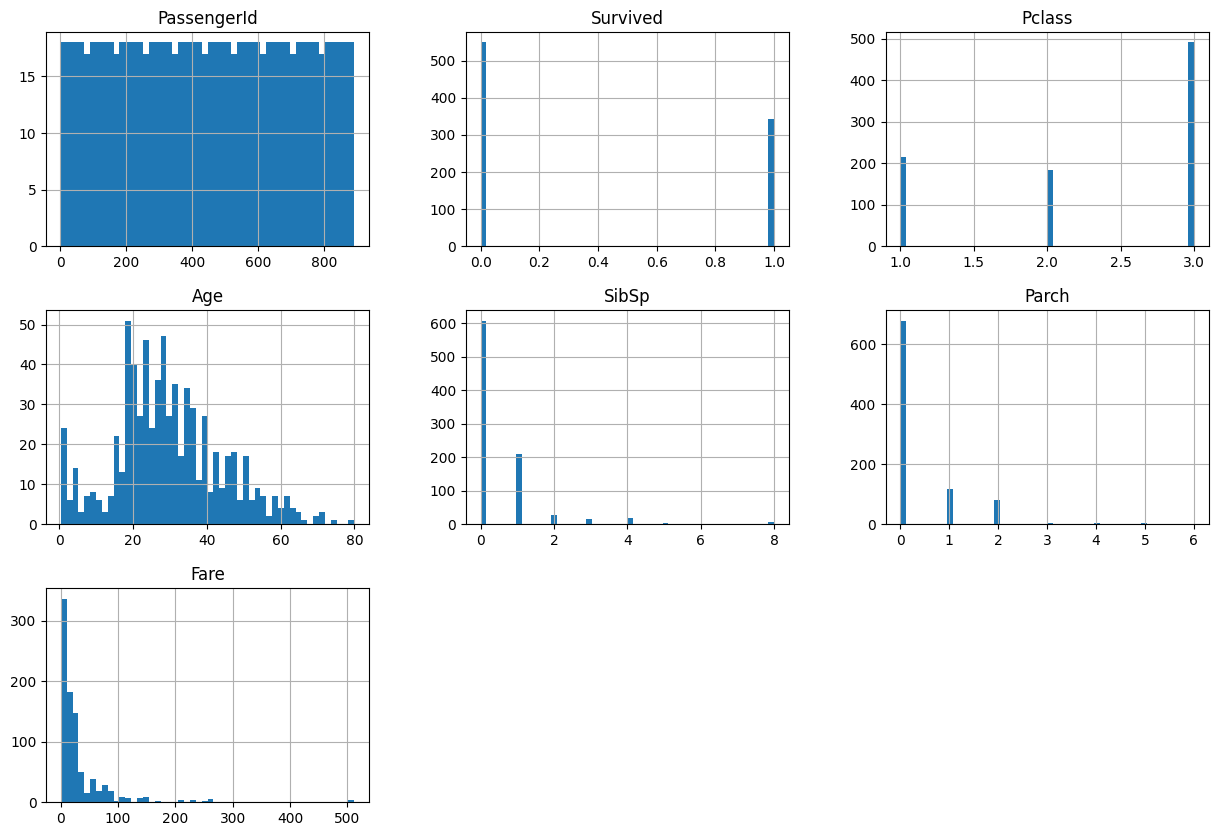

In [232]:
train.hist(bins=50, figsize=(15, 10));

In [233]:
train['Cabin'].value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


<Axes: xlabel='Embarked'>

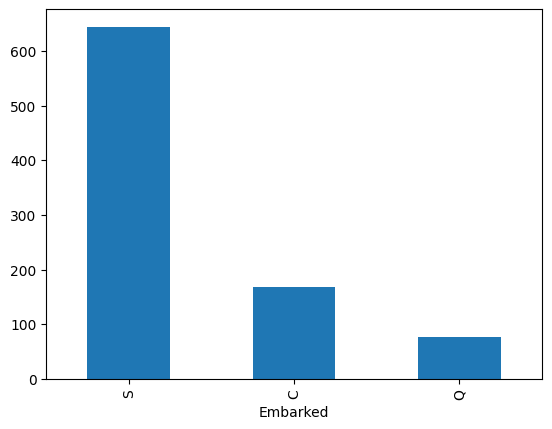

In [234]:
train['Embarked'].value_counts().plot(kind='bar')

In [235]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    train, test_size=0.2, stratify=train['Sex'], random_state=42
)

## EDA

In [266]:
titanic = strat_train_set.copy()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,NaN,S
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
734,735,0,2,"Troupiansky, Mr. Moses Aaron",male,23.0,0,0,233639,13.0000,NaN,S
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S


In [267]:
train['Sex_enc'] = train['Sex'].map({'male': 1, 'female': 0})
corr_matrix = titanic.corr(numeric_only=True)

corr_matrix['Survived'].sort_values(ascending=False)

,Survived
Survived,1.000000
Fare,0.248255
Parch,0.059276
PassengerId,-0.040851
SibSp,-0.045019
Age,-0.075542
Pclass,-0.314577


<Axes: xlabel='Age'>

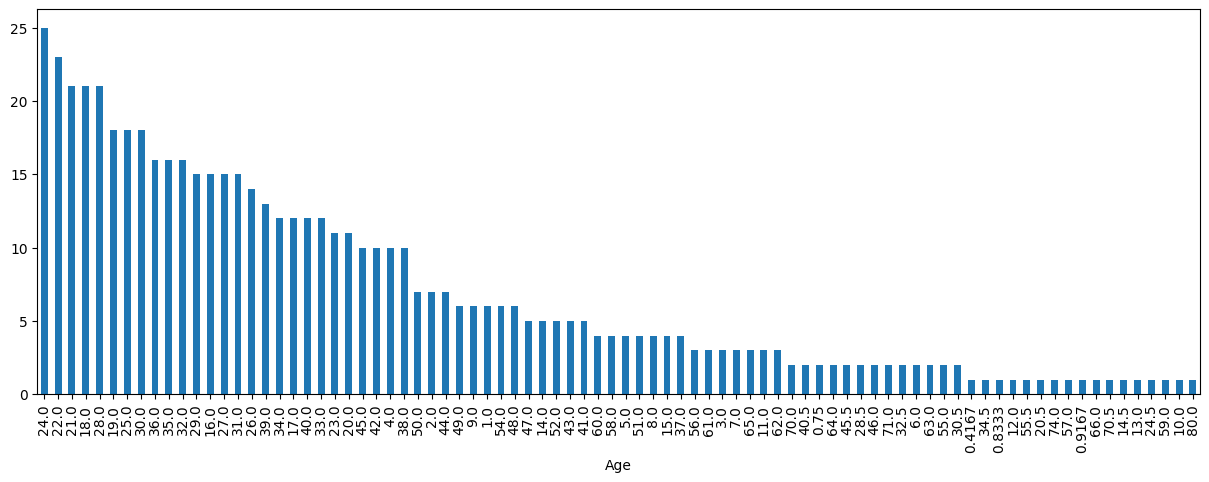

In [268]:
titanic['Age'].value_counts().plot(kind='bar', figsize=(15, 5))

<Axes: xlabel='Age_cat'>

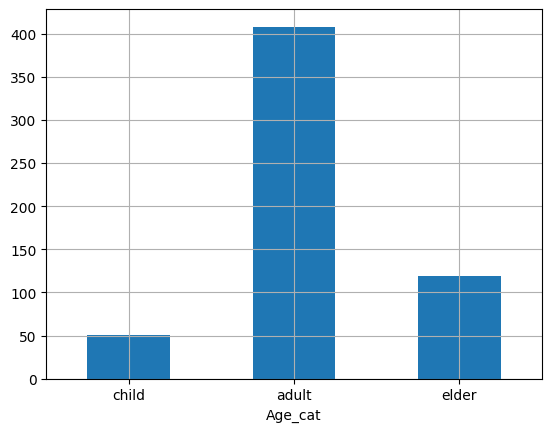

In [269]:
titanic['Age_cat'] = pd.cut(titanic['Age'],
                            bins=[0, 10, 40, np.inf],
                            labels=['child', 'adult', 'elder'])
titanic['Age_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)

In [270]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
titanic['Age_enc'] = ordinal_encoder.fit_transform(titanic[['Age_cat']])
corr_matrix = titanic.corr(numeric_only=True)

corr_matrix['Survived'].sort_values(ascending=False)

,Survived
Survived,1.000000
Fare,0.248255
Parch,0.059276
Age_enc,0.010824
PassengerId,-0.040851
SibSp,-0.045019
Age,-0.075542
Pclass,-0.314577


<Axes: xlabel='Age'>

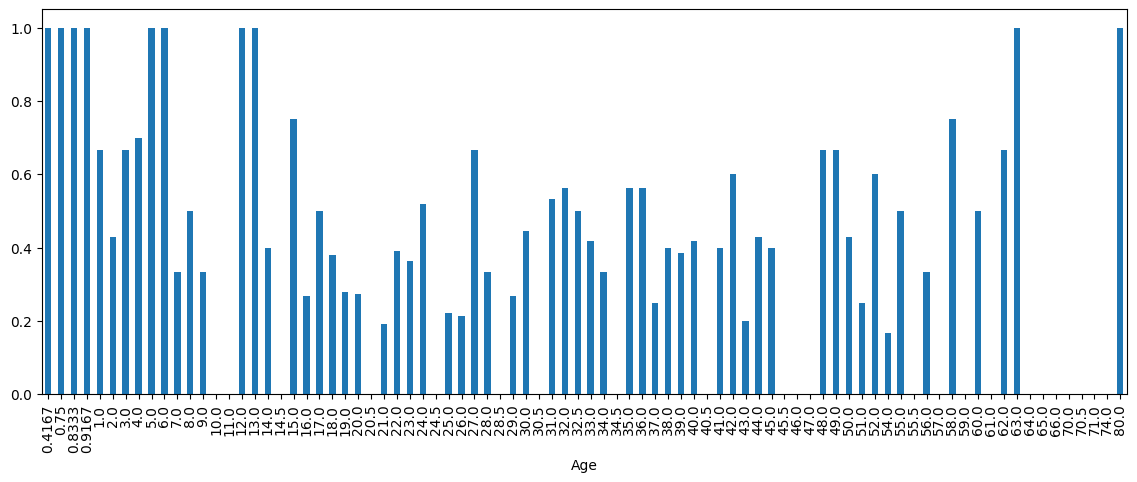

In [271]:
titanic.groupby('Age')['Survived'].mean().plot(kind='bar', figsize=(14, 5)) # Survival rate by age

<Axes: xlabel='SibSp'>

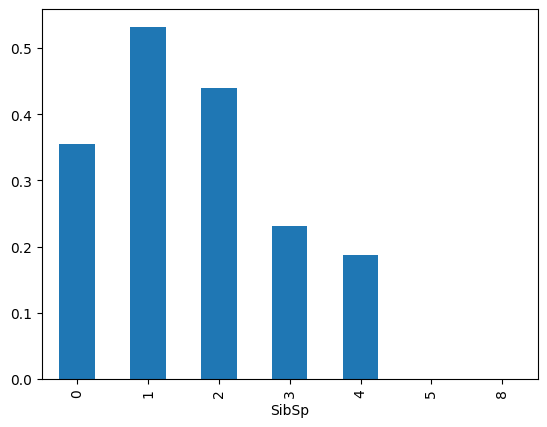

In [272]:
titanic.groupby('SibSp')['Survived'].mean().plot(kind='bar') # Survival rate by SibSP

<Axes: xlabel='Parch'>

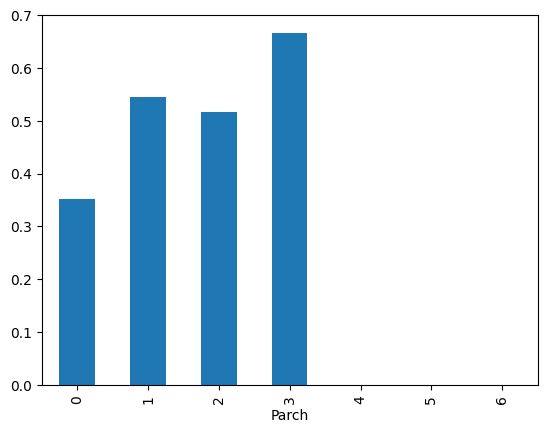

In [273]:
titanic.groupby('Parch')['Survived'].mean().plot(kind='bar') # Survival rate by Parch

In [274]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 788 to 261
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  712 non-null    int64   
 1   Survived     712 non-null    int64   
 2   Pclass       712 non-null    int64   
 3   Name         712 non-null    object  
 4   Sex          712 non-null    object  
 5   Age          578 non-null    float64 
 6   SibSp        712 non-null    int64   
 7   Parch        712 non-null    int64   
 8   Ticket       712 non-null    object  
 9   Fare         712 non-null    float64 
 10  Cabin        164 non-null    object  
 11  Embarked     710 non-null    object  
 12  Age_cat      578 non-null    category
 13  Age_enc      578 non-null    float64 
dtypes: category(1), float64(3), int64(5), object(5)
memory usage: 78.7+ KB


## Prepare the data for ML algorithms

In [275]:
titanic = strat_train_set.drop('Survived', axis=1)
titanic_labels = strat_train_set['Survived'].copy()

In [276]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=3)

titanic_num = titanic.select_dtypes(include=[np.number])

X = knn_imputer.fit_transform(titanic_num)

titanic_tr = pd.DataFrame(X, columns=titanic_num.columns, index=titanic_num.index)
titanic_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 788 to 261
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    float64
 1   Pclass       712 non-null    float64
 2   Age          712 non-null    float64
 3   SibSp        712 non-null    float64
 4   Parch        712 non-null    float64
 5   Fare         712 non-null    float64
dtypes: float64(6)
memory usage: 38.9 KB


In [277]:
ordinal_encoder = OrdinalEncoder()
titanic_tr['Embarked_enc'] = ordinal_encoder.fit_transform(titanic[['Embarked']])

In [278]:
most_frequent_value = titanic_tr['Embarked_enc'].value_counts().idxmax()
titanic_tr['Embarked_enc'] = titanic_tr['Embarked_enc'].fillna(most_frequent_value)

### Preprocessing pipeline

In [279]:
titanic = strat_train_set.drop('Survived', axis=1)

In [280]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 788 to 261
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          578 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        164 non-null    object 
 10  Embarked     710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [296]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

num_pipeline = make_pipeline(
    KNNImputer(n_neighbors=3),
    StandardScaler()
)

preprocessing = ColumnTransformer([
    ('drop_cols', 'drop', ['PassengerId', 'Name', 'Ticket', 'Cabin']),
    ('cat', cat_pipeline, ['Sex', 'Embarked']),
    ('num', num_pipeline, ['Age', 'Fare']),
    ('class', 'passthrough', ['Pclass'])
],
   remainder=StandardScaler())

In [297]:
titanic_prepared = preprocessing.fit_transform(titanic)
preprocessing.get_feature_names_out()

array(['cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S', 'num__Age', 'num__Fare',
       'class__Pclass', 'remainder__SibSp', 'remainder__Parch'],
      dtype=object)

## Select and train the model

In [298]:
titanic_labels.value_counts()

,count
Survived,
0,435
1,277


### SVC

In [299]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(titanic_prepared, titanic_labels)

SVC(random_state=42)

In [300]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

titanic_labels_pred = cross_val_predict(svm_clf, titanic_prepared, titanic_labels, cv=3)

In [301]:
from sklearn.metrics import recall_score, precision_score, f1_score

precision_score(titanic_labels, titanic_labels_pred), recall_score(titanic_labels, titanic_labels_pred), f1_score(titanic_labels, titanic_labels_pred)

(0.8091286307053942, 0.703971119133574, 0.752895752895753)

### Random Forest

In [302]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

titanic_labels_pred = cross_val_predict(forest_clf, titanic_prepared, titanic_labels, cv=3)

In [303]:
precision_score(titanic_labels, titanic_labels_pred), recall_score(titanic_labels, titanic_labels_pred), f1_score(titanic_labels, titanic_labels_pred)

(0.766798418972332, 0.7003610108303249, 0.7320754716981132)

Seems like SVC will be better fit here

In [315]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.pipeline import Pipeline


full_pipeline = Pipeline([
  ("preprocessing", preprocessing),
  ("svc", SVC(random_state=42, kernel='rbf'))
])

param_distribs = {"preprocessing__num__knnimputer__n_neighbors": [3],
                  'svc__C': randint(low=2, high=20),
                  'svc__gamma': uniform(loc=0.0001, scale=10)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='f1', random_state=42
)

In [316]:
rnd_search.fit(titanic, titanic_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=StandardScaler(),
                                                                transformers=[('drop_cols',
                                                                               'drop',
                                                                               ['PassengerId',
                                                                                'Name',
                                                                                'Ticket',
                                                                                'Cabin']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Sex',
                                                                                'Embarked']),
                                                                              ('n...
                                                                                'Fare']),
                                                                              ('class',
                                                                               'passthrough',
                                                                               ['Pclass'])])),
                                             ('svc', SVC(random_state=42))]),
                   param_distributions={'preprocessing__num__knnimputer__n_neighbors': [3],
                                        'svc__C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x791f20b39c90>,
                                        'svc__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x791f1ba8c5b0>},
                   random_state=42, scoring='f1')

In [318]:
rnd_search.best_params_, rnd_search.best_score_

({'preprocessing__num__knnimputer__n_neighbors': 3,
  'svc__C': 4,
  'svc__gamma': 0.20594494295802446},
 0.7350969764628413)

Model with default params is better, so it will be the final one

In [319]:
final_model = svm_clf

## Final evaluation

In [320]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [321]:
final_pipeline = Pipeline([
  ("preprocessing", preprocessing),
  ("svc", svm_clf)
])

preds = final_pipeline.predict(test)

preds = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': preds
})

preds.to_csv('titanic_predictions.csv', index=False)

# Final result from Kaggle: 0.7799